In [1]:
import pandas as pd

df = pd.read_csv('./data/shhs1-dataset-0.20.0.csv', encoding='cp1252', engine='python')

In [2]:
table1 = ['bmi_s1', 'age_s1', 'gender', 'systbp', 'diasbp', 'ess_s1', 'ahi_a0h4', 'ahi_c0h4', 'ahi_o0h4']

In [3]:
df = df[table1]

In [9]:
len(df) - len(csa)

5639

In [24]:
df.dropna(inplace=True)

In [4]:
# OSA: TOTOAL AHI >= 5 & OAHI > CAHI
# CSA: CAHI >= 5 & CAHO > OHAI
# No SA: TOTOAL AHI < 5
osa = df[(df['ahi_a0h4'] >= 5) & (df['ahi_o0h4'] > df['ahi_c0h4'])]
csa = df[(df['ahi_c0h4'] >= 5) & (df['ahi_c0h4'] > df['ahi_o0h4'])]
no_sa = df[df['ahi_a0h4'] < 5]

In [8]:
# split csa based in these bins: bins=[0, 5, 15, 30, 1000]

csa['ahi_c0h4'] = pd.cut(csa['ahi_c0h4'], bins=[0, 5, 15, 30, 1000], labels=['0-5', '5-15', '15-30', '30+'])

# count the number of each bin
csa['ahi_c0h4'].value_counts()



C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_6492\2637900517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csa['ahi_c0h4'] = pd.cut(csa['ahi_c0h4'], bins=[0, 5, 15, 30, 1000], labels=['0-5', '5-15', '15-30', '30+'])


5-15     103
15-30     38
30+       24
0-5        0
Name: ahi_c0h4, dtype: int64

In [5]:
print(len(no_sa))
print(len(osa))
print(len(csa))

2830
2632
165


In [32]:
# add labels based on the criteria above
osa['label'] = 'OSA'
csa['label'] = 'CSA'
no_sa['label'] = 'No SA'

# combine the three dataframes
df = pd.concat([osa, csa, no_sa])

C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_7484\16174079.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  osa['label'] = 'OSA'
C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_7484\16174079.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  csa['label'] = 'CSA'
C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_7484\16174079.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [33]:
features = ['bmi_s1', 'age_s1', 'gender', 'systbp', 'diasbp', 'ess_s1', 'ahi_a0h4']

In [34]:
df_table1 = df[features + ['label']]

In [35]:
df_table1

,bmi_s1,age_s1,gender,systbp,diasbp,ess_s1,ahi_a0h4,label
1,32.950680,78,1,168.0,68.0,14.0,19.780220,OSA
2,24.114150,77,2,127.0,68.0,5.0,5.020921,OSA
6,29.983588,52,1,142.0,99.0,11.0,10.105263,OSA
8,25.817447,69,1,201.0,101.0,10.0,24.409673,OSA
11,25.401235,68,1,152.0,90.0,7.0,20.417335,OSA
...,...,...,...,...,...,...,...,...
5795,35.790598,71,2,126.0,73.0,5.0,2.284041,No SA
5796,21.957367,55,2,136.0,77.0,13.0,0.807537,No SA
5798,32.414213,54,2,118.0,66.0,7.0,1.878669,No SA
5801,24.228571,55,1,89.0,56.0,17.0,3.605769,No SA


In [10]:
df_table1.dropna(inplace=True)

C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_7484\2133795070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table1.dropna(inplace=True)


In [41]:
df_table1

,BMI,Age,Gender,Systolic BP,Diastolic BP,ESS,AHI,label
1,32.950680,78,1,168.0,68.0,14.0,19.780220,OSA
2,24.114150,77,2,127.0,68.0,5.0,5.020921,OSA
6,29.983588,52,1,142.0,99.0,11.0,10.105263,OSA
8,25.817447,69,1,201.0,101.0,10.0,24.409673,OSA
11,25.401235,68,1,152.0,90.0,7.0,20.417335,OSA
...,...,...,...,...,...,...,...,...
5795,35.790598,71,2,126.0,73.0,5.0,2.284041,No SA
5796,21.957367,55,2,136.0,77.0,13.0,0.807537,No SA
5798,32.414213,54,2,118.0,66.0,7.0,1.878669,No SA
5801,24.228571,55,1,89.0,56.0,17.0,3.605769,No SA


In [46]:
# make a model trying to predict the label
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df_model = df_table1.dropna()

features = df_model.columns.tolist() 
features.remove('label')
features.remove('AHI')

X = df_model[features]
y = df_model['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# calculate f1 score
from sklearn.metrics import f1_score

f1_score(y_test, y_pred, average='weighted')


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.6354352796782965

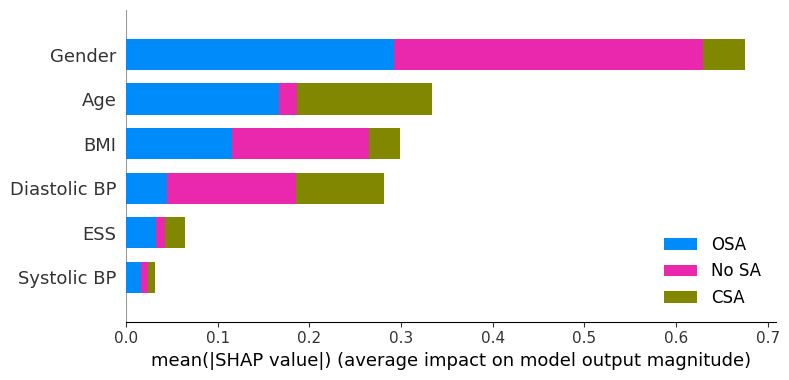

In [51]:
# draw shap values
import shap

explainer = shap.LinearExplainer(model, X_train)
shap_values = explainer.shap_values(X_test)

# display name od the classes on the plot legend
# plot bee plot

# shap.waterfall_plot(shap_values[0], X_test.iloc[0], feature_names=features)

shap.summary_plot(shap_values, X_test, class_names=model.classes_)

In [37]:
# Do statistics based on label, Do Mean, Std, and perbalance(95% CI)
df_table1.groupby('label').describe().T

# Rename the columns
df_table1.rename({'bmi_s1': 'BMI', 'age_s1': 'Age', 'gender': 'Gender', 'systbp': 'Systolic BP', 'diasbp': 'Diastolic BP', 'ess_s1': 'ESS', 'ahi_a0h4': 'AHI'}, axis=1, inplace=True)

# Keep only mean, std, and 95% CI
# round to 2 decimal places
means = df_table1.groupby('label').mean().T.round(1)
stds = df_table1.groupby('label').std().T.round(1)
counts = df_table1.groupby('label').count().T

C:\Users\Risto Trajanov\AppData\Local\Temp\ipykernel_7484\1810167469.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_table1.rename({'bmi_s1': 'BMI', 'age_s1': 'Age', 'gender': 'Gender', 'systbp': 'Systolic BP', 'diasbp': 'Diastolic BP', 'ess_s1': 'ESS', 'ahi_a0h4': 'AHI'}, axis=1, inplace=True)


In [38]:
counts

label,CSA,No SA,OSA
BMI,165,2805,2618
Age,165,2830,2632
Gender,165,2830,2632
Systolic BP,162,2771,2587
Diastolic BP,162,2766,2587
ESS,158,2708,2546
AHI,165,2830,2632


In [39]:
means

label,CSA,No SA,OSA
BMI,29.5,26.8,29.4
Age,64.1,60.9,65.5
Gender,1.3,1.6,1.4
Systolic BP,129.6,124.9,129.6
Diastolic BP,75.3,73.1,74.1
ESS,8.1,7.3,8.2
AHI,18.4,2.0,18.5


In [40]:
stds

label,CSA,No SA,OSA
BMI,5.0,4.4,5.3
Age,11.2,11.3,10.6
Gender,0.5,0.5,0.5
Systolic BP,18.9,19.2,19.2
Diastolic BP,11.7,11.0,12.2
ESS,4.8,4.2,4.5
AHI,14.8,1.4,15.6


In [16]:
# Comparisons of continuous variables were made among 
# the 3 groups with one-way ANOVA with subsequent pairwise 
# Tukey HSD test
from scipy import stats

# ANOVA
# H0: The means of the groups are equal
# H1: The means of the groups are not equal
# p-value < 0.05, reject H0
# p-value > 0.05, fail to reject H0
# p-value = 0.05, marginal

# BMI
print("BMI")
print(stats.f_oneway(osa['bmi_s1'], csa['bmi_s1'], no_sa['bmi_s1']))

# Age
print("Age")
print(stats.f_oneway(osa['age_s1'], csa['age_s1'], no_sa['age_s1']))

# gender
print("Gender")
print(stats.f_oneway(osa['gender'], csa['gender'], no_sa['gender']))

# systbp
print("Systbp")
print(stats.f_oneway(osa['systbp'], csa['systbp'], no_sa['systbp']))

# diasbp
print("Diasbp")
print(stats.f_oneway(osa['diasbp'], csa['diasbp'], no_sa['diasbp']))

# ess_s1
print("Ess_s1")
print(stats.f_oneway(osa['ess_s1'], csa['ess_s1'], no_sa['ess_s1']))

# ahi_a0h4
print("Ahi_a0h4")
print(stats.f_oneway(osa['ahi_a0h4'], csa['ahi_a0h4'], no_sa['ahi_a0h4']))

# Tukey HSD test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# BMI
tukey = pairwise_tukeyhsd(df_table1['bmi_s1'], df_table1['label'])
tukey.summary()

# Age
tukey = pairwise_tukeyhsd(df_table1['age_s1'], df_table1['label'])
tukey.summary()





BMI
F_onewayResult(statistic=178.89195549666258, pvalue=6.55236171672407e-76)
Age
F_onewayResult(statistic=119.9245383463436, pvalue=1.1499882927179695e-51)
Gender
F_onewayResult(statistic=174.83909338791827, pvalue=2.9274338921080014e-74)
Systbp
F_onewayResult(statistic=41.076643041870014, pvalue=1.983292012261657e-18)
Diasbp
F_onewayResult(statistic=7.208300939239418, pvalue=0.0007476898168833154)
Ess_s1
F_onewayResult(statistic=29.133155965242462, pvalue=2.60988694668077e-13)
Ahi_a0h4
F_onewayResult(statistic=1469.7275857978243, pvalue=0.0)


group1,group2,meandiff,p-adj,lower,upper,reject
CSA,No SA,-3.3433,0.0006,-5.443,-1.2437,True
CSA,OSA,1.3208,0.3043,-0.7822,3.4238,False
No SA,OSA,4.6641,0.0,3.9559,5.3724,True
